**WeSTEM High School Conference: Machine Learning Workshop** 

_Notebook curated by [Prajna Soni](pvs262@nyu.edu)_

**A. WHAT IS MACHINE LEARNING?**

This notebook is curated to help you understand the basics of machine learning and artificial intelligence so that you can follow along without having to type all of the code yourself. 

We will use **[Python](http://www.python.org)**, a high-level, general-purpose programming language, in this notebook. It is a great language to get started on and there is a lot of documentation, including tutorials online so you can continue learning it after this workshop too!

_(For more info, check out [Kaggle Learn](https://www.kaggle.com/learn/overview))_

**B. STARTER EXERCISE**

Define Artificial Intelligence:

_Answer here:_

Define Machine Learning:

_Answer here:_

**C. THOUGHT EXERCISE**
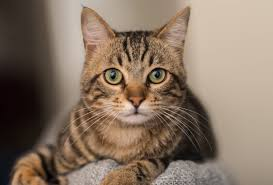

1. How do you decide whether what you are looking at is a cat or a dog?
2. Can you list the different checks you go through mentally to determine whether the picture on the screen is a cat or a dog?
2. How do you teach a machine to do the same?

**D. DEFINITIONS AND APPLICATIONS**

Artificial Intelligence:

Machine Learning:


**E. CLASSIFIERS**

1. **Classification and Class Probability Estimation** - BINARY: Is this animal aquatic? MULTICLASS: Which class does this animal belong to? (think bank fraud)
2. **Regression** - How much rain can we expect tomorrow? (think ______)
3. **Similarity Matching** - Are Alia and Prajna similar? (think Netflix)
4. **Clustering** - Which majors exist in this group of students? (think ______)
5. **Co-occurrence Grouping** - Which items are most likely to be bought together at the supermarket? (think store offers)
6. **Profiling** - What are the typical characteristics/behaviours of Carrie? (think ______)
7. **Link Prediction** - Are Alia and Prajna friends? (think Facebook)

_Source: https://www.juvo.be/blog/popular-data-mining-algorithms_

**Supervised vs Unsupervised** - named based on the teacher-class analogy

**Supervised Methods** - have a specific target defined 
- "Can we find groups of students who are likely to major in Computer Science?"
    
**Unsupervised Methods** - no defined target 
- "Do our students fall into groups?"



**F. BINARY CLASSIFICATION PROBLEM**

_Adapted from lecture slides by [Prof. George Valkanas](https://www.linkedin.com/in/gvalk/) (NYU Stern)_

Let's learn the basics of classification through a **binary classification problem**. Binary classification means that the machine model has to classify individuals into one of two possible groups. In this problem, we will look at classifying responses of a pop-up lemonade-charity campaign.



Imagine you want to set up a temporary lemonade stall to raise money for a charity. 
1. You have a limited number of posters that you can distribute to houses around your neighbourhood.
2. You have historic data from previous campaigns on characteristics of neighbours and whether they purchased a lemonade.

Let's think about this. 
1. **Why does historic data matter?**
    _Your answer here_
2. **Why do characteristics of neighbours matter?**
    _Your answer here_
3. **Why is their previous response to the campaign important?**
    _Your answer here_

Distribution of neighbours and their responses:

Red = no purchase

Blue = yes purchase

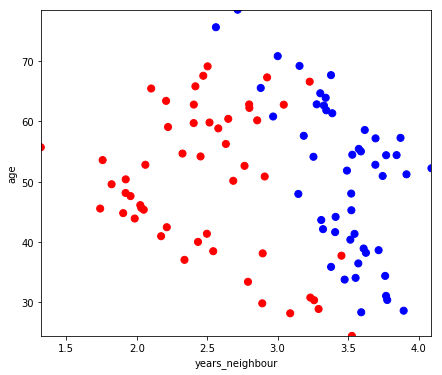

In [1]:
# Import the libraries we will be using

import os
import numpy as np
import pandas as pd
import math
import matplotlib.patches as patches
import matplotlib.pylab as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.tree import export_graphviz


%matplotlib inline

#-----------------------------------------------------------------------------------

# A function that picks a color for an instance, depending on its target variable
# We use 0 for "No" and "1" for yes.
# The function returns a list of items, one item for each instance (in the order given)
def Color_Data_Points(target):
    color = ["red" if t == 0 else "blue" for t in target]
    return color


# A function to plot the data in a scatter plot
# data: The data we want to visualize
# v1: The name used to access the X-axis variable information in the data parameter
# v2: The name used to access the Y-axis variable information in the data parameter
# tv: The name used to access the target variable information in the data parameter
def Plot_Data(data, v1, v2, tv):

    # Make the plot square
    plt.rcParams['figure.figsize'] = [12.0, 8.0]
    
    # Color
    color = Color_Data_Points(data[tv])
    
    # Plot and label
    plt.scatter(data[v1], data[v2], c=color, s=50)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.xlim([min(data[v1]) , max(data[v1]) ])
    plt.ylim([min(data[v2]) , max(data[v2]) ])

#-----------------------------------------------------------------------------------
    
# Set the randomness
np.random.seed(36)

# Number of users, i.e. number of instances in our dataset
n_users = 100

# Features that we know about each user. The attributes below are for illustration purposes only!
variable_names = ["name", "age", "years_neighbour"]
variables_keep = ["years_neighbour", "age"]
target_name = "response"

# Generate data with the "datasets" function from SKLEARN (package)
# This function returns two variables: predictors and target

predictors, target = datasets.make_classification(n_features=3, n_redundant=0, 
                                                  n_informative=2, n_clusters_per_class=2,
                                                  n_samples=n_users)

# We will write this data in a dataframe (pandas package)

data = pd.DataFrame(predictors, columns=variable_names)

# We want to take each column of the dataframe to change the values 

data['age'] = data['age'] * 10 + 50
data['years_neighbour'] = (data['years_neighbour'] + 6)/2
data[target_name] = target

# Our variables (features) will be stored in one variable called X
X = data[variables_keep]

# Our target will be stored in one variable called Y
Y = data[target_name]

# Show the first 5 values of our data
pd.concat([X, Y], axis=1).head(5)

plt.figure(figsize=[7,6])
Plot_Data(data, "years_neighbour", "age", "response")

Let's explore the individual features - does the age of the customer influence their decision to buy lemonade or does the number of years they have been your neighbour influence their decision to buy lemonade more?

Text(0.5, 0, 'age')

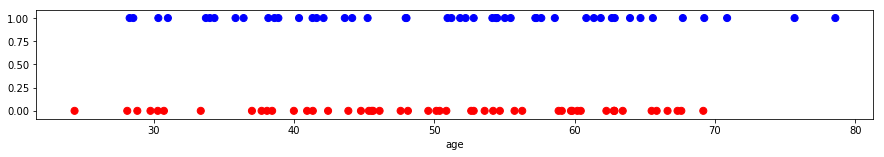

In [2]:
plt.rcParams['figure.figsize'] = [15.0, 2.0]

color = color = Color_Data_Points(data["response"])
plt.scatter(X['age'], Y, c=color, s=50)
plt.xlabel('age')

Text(0.5, 0, 'years_neighbour')

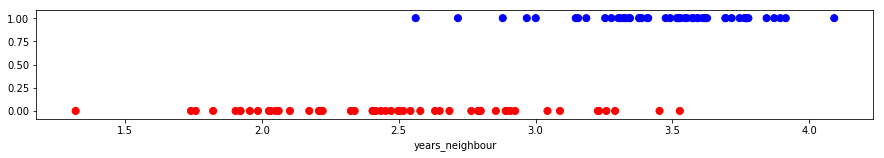

In [3]:
plt.rcParams['figure.figsize'] = [15.0, 2.0]

color = color = Color_Data_Points(data["response"])
plt.scatter(X['years_neighbour'], Y, c=color, s=50)
plt.xlabel('years_neighbour')

**Which feature/characteristic has a better split?** _Your answer here_

If you had to set a condition to split based on the graphs above, how would you decide to distribute the posters?

Would you bet that neighbours who had lived next you you for 3 years or longer were more likely to buy your lemonade?

In [4]:
# A function that creates the surface of a decision tree

def Decision_Surface(data, target, model):
    # Get bounds
    x_min, x_max = data[data.columns[0]].min(), data[data.columns[0]].max()
    y_min, y_max = data[data.columns[1]].min(), data[data.columns[1]].max()

    # Create a mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max,0.01), np.arange(y_min, y_max,0.01))
    meshed_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=[12,7])
    Z = model.predict(meshed_data).reshape(xx.shape)

    plt.title("Decision surface")    
    plt.ylabel("age")
    plt.xlabel("years_customer")

    color = Color_Data_Points(target)
    cs = plt.contourf(xx, yy, Z, levels=[-1,0,1], colors=['#ff6666', '#66b2ff'] )
    plt.scatter(data[data.columns[0]], data[data.columns[1]], color=color, edgecolor='black' )


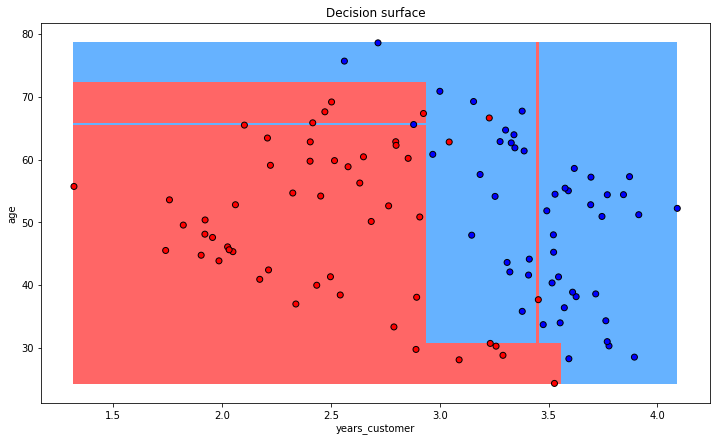

In [5]:
# Let's define the model (tree)
my_tree = DecisionTreeClassifier(max_depth=5,criterion="entropy") 
#entropy is one measure of determining where to split

# Let's tell the model what is the data
my_tree.fit(X, Y)

#Let's print an image with the results
Decision_Surface(X,Y,my_tree)

In [6]:
print ( "Accuracy = %.3f" % (metrics.accuracy_score(my_tree.predict(X), Y)) )

Accuracy = 0.980


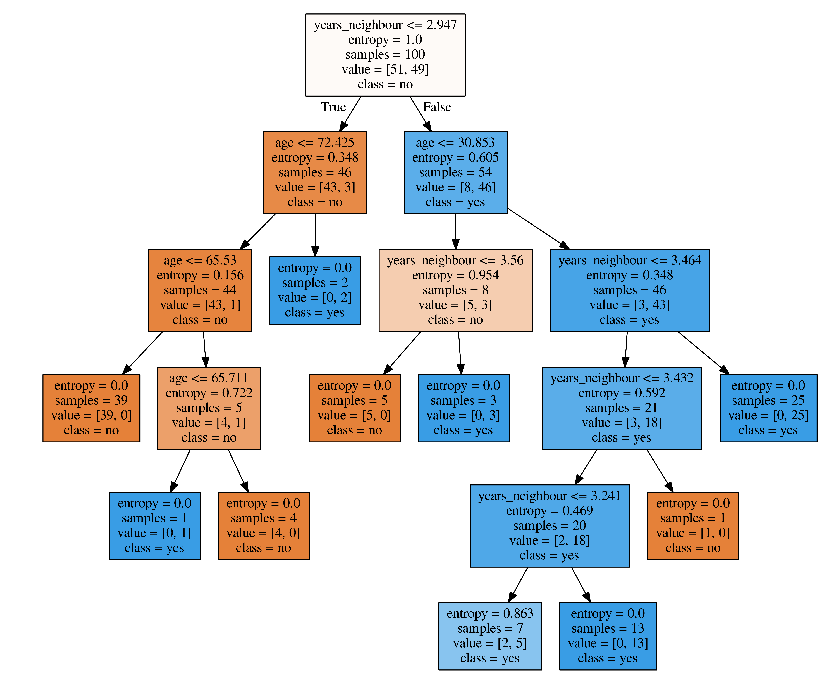

In [7]:
tree.export_graphviz(my_tree, out_file = 'tree.dot', feature_names = variables_keep, class_names = ['no', 'yes'], filled = True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

Now we've seen how decision trees work in classifying instances based on features/characteristics. Let's make the problem a little harder whilst using a real dataset! Let's teach a computer how to identify what class an animal belongs to - let's train a smart zoo-keeper!

**G. SMART ZOOKEEPER**

We have data about the characteristics of different animals in the zoo, and we want to train our smart zoo-keeping model so it can tell us whether an animal is a Mammal, a Bird, a Reptile, a Fish, a Amphibian, a Bug, or a Invertebrate.

Let's explore the data set so we can see what kind of characteristics we have and how the data is stored.

In [8]:
zoo_class = pd.read_csv("../input/zoo-animal-classification/class.csv")
zoo = pd.read_csv("../input/zoo-animal-classification/zoo.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


**INTERPRETING THIS DATA**

We can now see the first five lines of this data. We have 16 characteristics/features about each animal, with each boolean (true/false) characteristic marked as a 1 (true) or a 0 (false) and numeric characteristics with their respective answers.

E.g. predator is a boolean - true or false, legs is a numeric feature - 4 legs or 0 legs, etc. 

What else can we see from this set of characteristics?

In [9]:
#PREPARING THE DATASET
# Here, we split the dataset into the characteristics/features (X) and the class (Y)
X = zoo.drop('class_type', axis=1)
X = X.drop('animal_name',  axis=1)
Y = zoo['class_type']

# We then split the data into a training (80%) and testing (20%) dataset
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.20, random_state=262, stratify=Y)

#Let's look at the first 5 rows of our train_X data set. 
#This is the dataset with characteristics/features that we will be training on
train_X.head()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0


**TRAIN AND TEST SPLIT**

We split our dataset into a training set that the machine "sees" as it trains and learns, and a separate test set which it has never "seen" before.

**Why is it important to split our dataset into training and testing set?**

_Your answer here_

In [10]:
#declare decision tree classifier classifiying based on entropy 
zkTree = DecisionTreeClassifier(max_depth = 3, criterion ='entropy')
#train decision tree classifier on training data
zkTree.fit(train_X, train_Y)
#get predicted results for given test_X
zkTreePred = zkTree.predict(test_X)
acc_score = metrics.accuracy_score(test_Y, zkTreePred)
print(acc_score)
metrics.confusion_matrix(test_Y, zkTreePred)

0.8095238095238095


array([[8, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 2]])

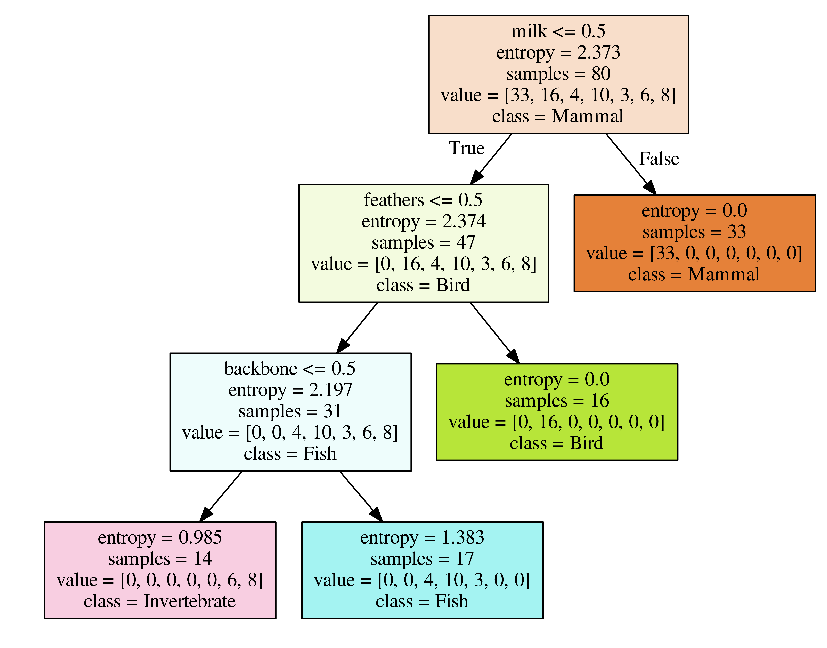

In [11]:
#Let's visualise the tree
tree.export_graphviz(zkTree, out_file = 'zkTree.dot', feature_names = X.columns, class_names = zoo_class['Class_Type'], filled = True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'zkTree.dot', '-o', 'zkTree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('zkTree.png'))
plt.axis('off');
plt.show();

**UNDERSTANDING THE RESULTS**

Above, we now have the accuracy score of our newly trained Zoo Keeper (zkTree) as well as the Confusion Matrix*.

_*A confusion matrix is a table of the predicted values versus the actual values so you know where the model is predicting false values._

Let's change the max_depth of the decision tree classifier and see how that changes things. 



**H. APPLICATIONS OF MACHINE LEARNING**

Can you think of applications of machine learning in real life?

_Your answer here_

**WELL DONE FOR MAKING IT THIS FAR!**

This is the end of the workshop but feel free to ask questions or email the facilitators with any questions you may have: 
* Prajna Soni (prajna.soni@nyu.edu)
* Alia Albastaki (alia.albastaki@nyu.edu)